In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json as js
from sklearn.feature_selection import chi2

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition 2.csv')
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis = 1)
dict_category = {i:{} for i in ['JobRole', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'Attrition', 'OverTime']}
for col in dict_category:
    i = 0
    for name in pd.factorize(df[col])[1]:
        dict_category[col][name] = i
        i+=1
    df[col] = pd.factorize(df[col])[0]
dict_json = js.dumps(dict_category, indent=4)
print(dict_json)
df.head(10)

{
    "JobRole": {
        "Sales Executive": 0,
        "Research Scientist": 1,
        "Laboratory Technician": 2,
        "Manufacturing Director": 3,
        "Healthcare Representative": 4,
        "Manager": 5,
        "Sales Representative": 6,
        "Research Director": 7,
        "Human Resources": 8
    },
    "BusinessTravel": {
        "Travel_Rarely": 0,
        "Travel_Frequently": 1,
        "Non-Travel": 2
    },
    "Department": {
        "Sales": 0,
        "Research & Development": 1,
        "Human Resources": 2
    },
    "EducationField": {
        "Life Sciences": 0,
        "Other": 1,
        "Medical": 2,
        "Marketing": 3,
        "Technical Degree": 4,
        "Human Resources": 5
    },
    "Gender": {
        "Female": 0,
        "Male": 1
    },
    "MaritalStatus": {
        "Single": 0,
        "Married": 1,
        "Divorced": 2
    },
    "Attrition": {
        "Yes": 0,
        "No": 1
    },
    "OverTime": {
        "Yes": 0,
        "No": 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,2,1,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,0,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,1,1,...,3,4,1,6,3,3,2,2,2,2
5,32,1,1,1005,1,2,2,0,4,1,...,3,3,0,8,2,2,7,7,3,6
6,59,1,0,1324,1,3,3,2,3,0,...,4,1,3,12,3,2,1,0,0,0
7,30,1,0,1358,1,24,1,0,4,1,...,4,2,1,1,2,3,1,0,0,0
8,38,1,1,216,1,23,3,0,4,1,...,4,2,0,10,2,3,9,7,1,8
9,36,1,0,1299,1,27,3,2,3,1,...,3,2,2,17,3,2,7,7,7,7


In [14]:
df_category = df[['OverTime', 'TrainingTimesLastYear', 'StockOptionLevel', 'RelationshipSatisfaction', 'JobSatisfaction', 'JobRole', 'JobInvolvement', 'EnvironmentSatisfaction', 'Department', 'BusinessTravel', 'Education', 'EducationField', 'Gender', 'MaritalStatus', 'JobLevel', 'Attrition', 'PerformanceRating', 'WorkLifeBalance']]
df_numeric = df[['PercentSalaryHike', 'MonthlyRate', 'HourlyRate', 'Age', 'DailyRate', 'DistanceFromHome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MonthlyIncome']]
df_reponse = df[['Attrition', 'PerformanceRating', 'WorkLifeBalance', 'MonthlyIncome']]

Numerical Data Visualisation


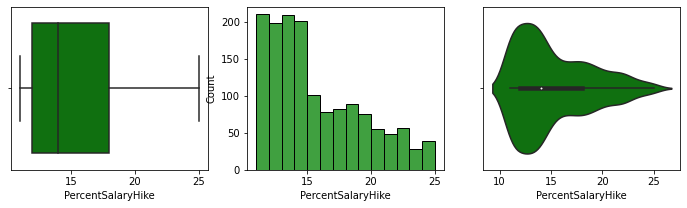

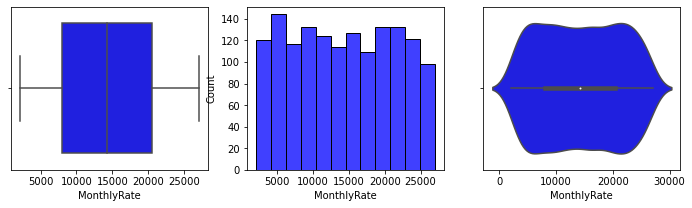

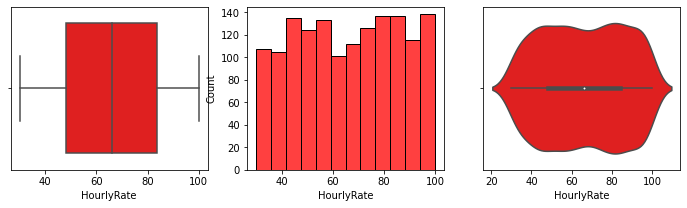

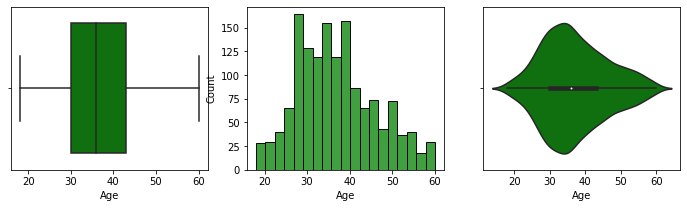

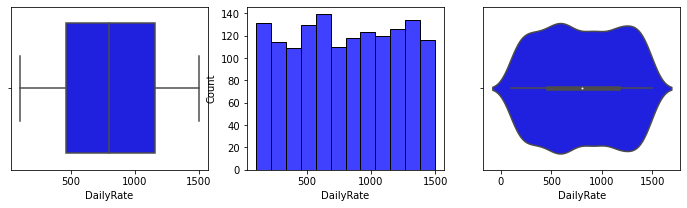

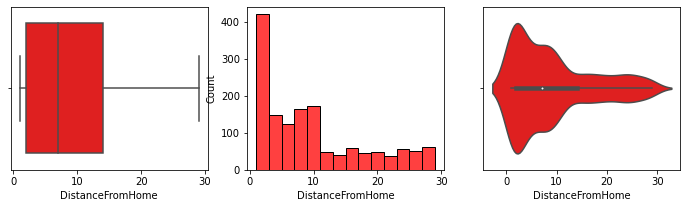

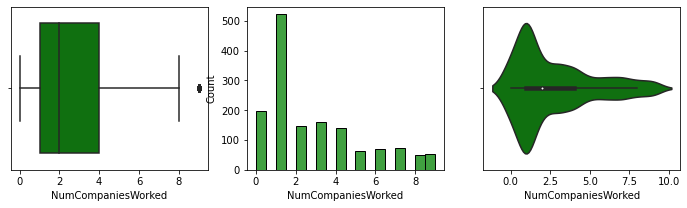

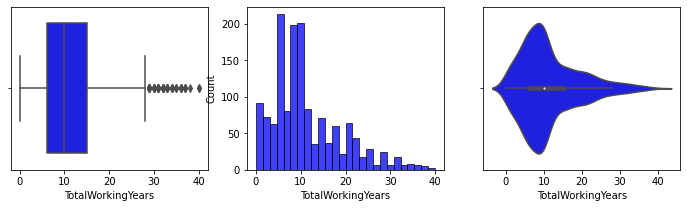

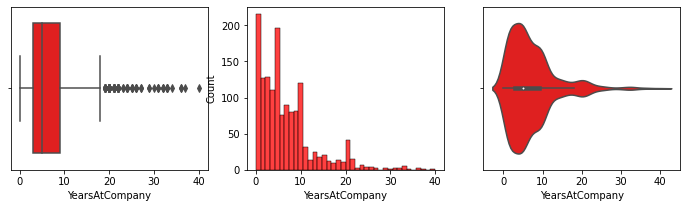

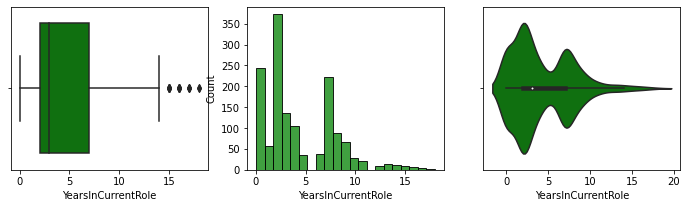

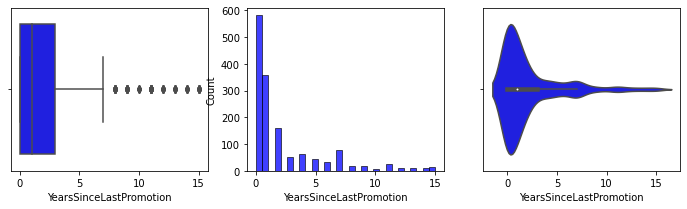

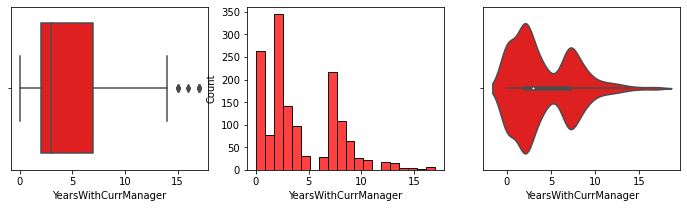

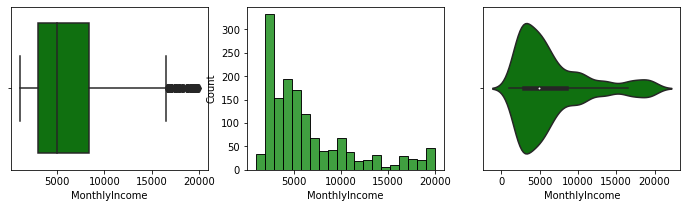

In [15]:
print('Numerical Data Visualisation')
color = ['g', 'b', 'r']
for i, name in enumerate(df_numeric):
    f, ax = plt.subplots(1, 3, figsize=(12, 3))
    sns.boxplot(x=df[name], orient = 'h', ax = ax[0], color=color[i%3])
    sns.histplot(x=df[name], kde = False, ax = ax[1], color=color[i%3])
    sns.violinplot(x=df[name], ax=ax[2], color=color[i%3])

Category Variable Visualization
{
    "JobRole": {
        "Sales Executive": 0,
        "Research Scientist": 1,
        "Laboratory Technician": 2,
        "Manufacturing Director": 3,
        "Healthcare Representative": 4,
        "Manager": 5,
        "Sales Representative": 6,
        "Research Director": 7,
        "Human Resources": 8
    },
    "BusinessTravel": {
        "Travel_Rarely": 0,
        "Travel_Frequently": 1,
        "Non-Travel": 2
    },
    "Department": {
        "Sales": 0,
        "Research & Development": 1,
        "Human Resources": 2
    },
    "EducationField": {
        "Life Sciences": 0,
        "Other": 1,
        "Medical": 2,
        "Marketing": 3,
        "Technical Degree": 4,
        "Human Resources": 5
    },
    "Gender": {
        "Female": 0,
        "Male": 1
    },
    "MaritalStatus": {
        "Single": 0,
        "Married": 1,
        "Divorced": 2
    },
    "Attrition": {
        "Yes": 0,
        "No": 1
    },
    "OverTime": {


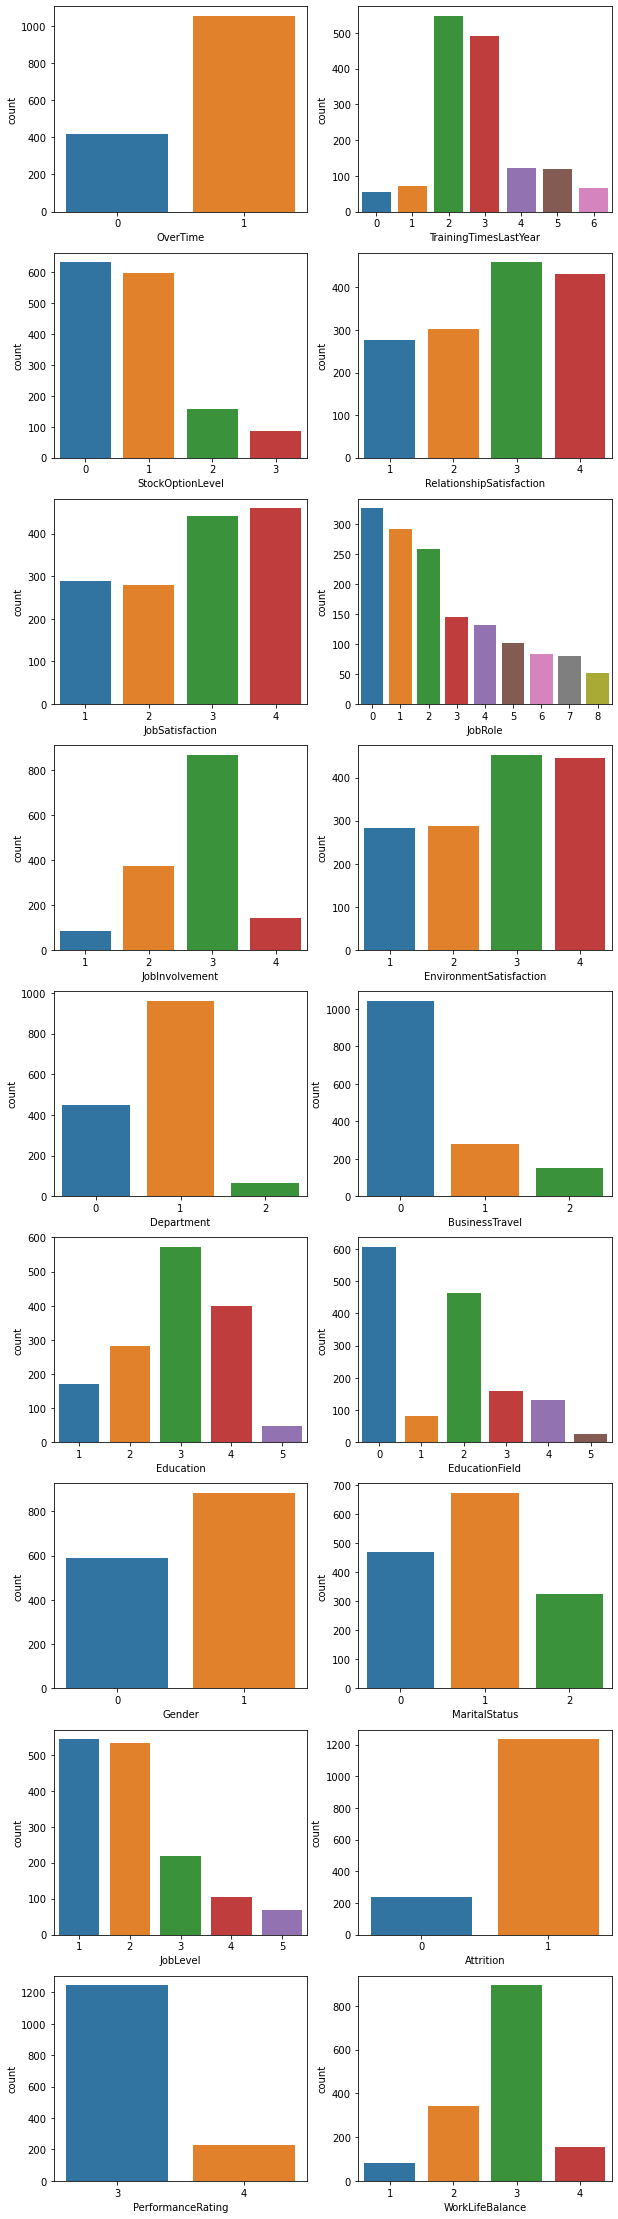

In [17]:
print('Category Variable Visualization')
print(dict_json)
f, ax = plt.subplots(9, 2, figsize=(10, 40))
# 00 01, 10 11, 20 21, 30 31
for i, name in enumerate(df_category):
    a, b = i//2, i%2
    sns.countplot(x=df_category[name], ax = ax[a, b])

# Attrition

Numerical variables VS Attrition


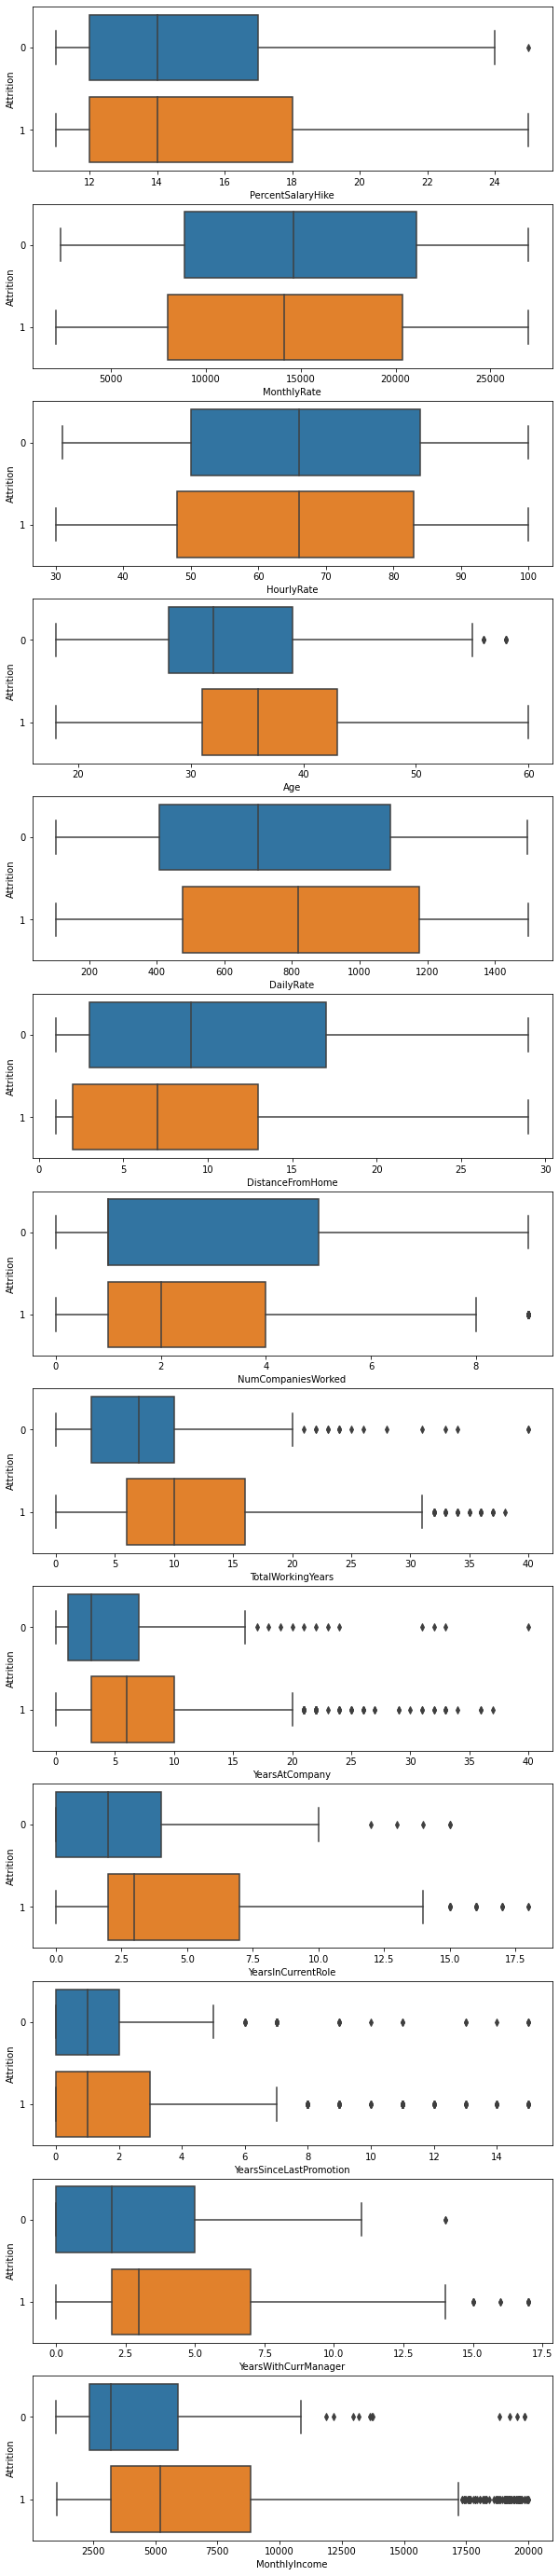

In [20]:
print('Numerical variables VS Attrition')
f, ax = plt.subplots(13, 1, figsize=(10, 50))
for i, name in enumerate(df_numeric):
    sns.boxplot(x=name, y='Attrition', data=df, orient='h', ax=ax[i])

Category Variable VS Attrition ！！！Bar color


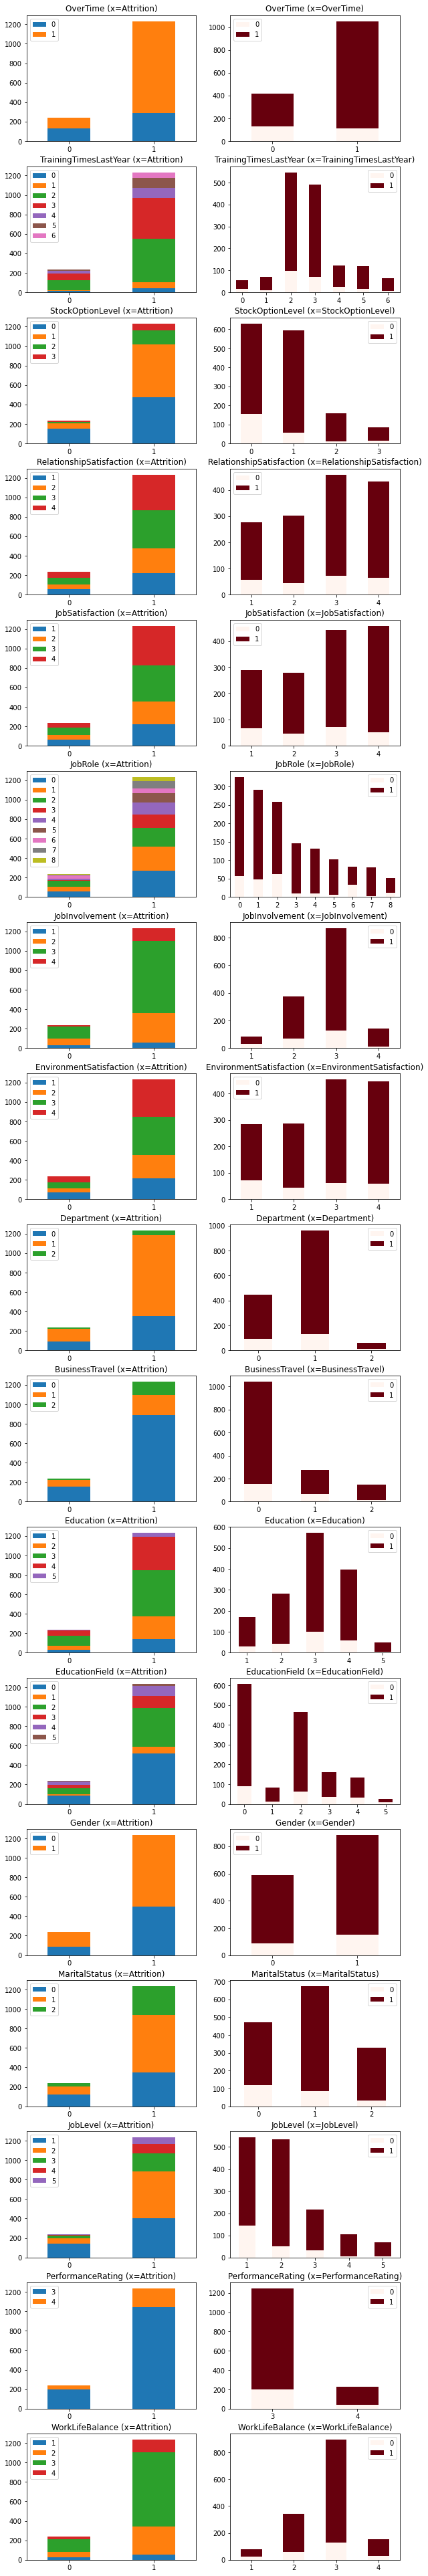

In [21]:
print('Category Variable VS Attrition ！！！Bar color')
fig, ax = plt.subplots(17, 2, figsize=(10, 70))
for i, name in enumerate(df_category.drop(['Attrition'], axis=1)):
    df_test = df[[name, 'Attrition', 'Age']].groupby([name, 'Attrition']).count()
    name_id = df_test.index.get_level_values(name).unique()
    dic = {j:list((df_test.loc[j])['Age']) for j in name_id}
    df_plot = pd.DataFrame(dic)
    df_plotT = df_plot.T
    pt0 = df_plot.reset_index().plot(
        x = 'index',
        rot = 0,
        kind = 'bar',
        stacked = True,
        title = name+' (x=Attrition)',
        ax=ax[i, 0],
        legend = True,
    )
    pt1 = df_plotT.reset_index().plot(
        x = 'index',
        rot = 0,
        kind = 'bar',
        stacked = True,
        title = name+' (x='+name+')',
        ax=ax[i, 1],
        legend = True,
        colormap = 'Reds'
    )
    ax[i, 0].set(xlabel=None)
    ax[i, 1].set(xlabel=None)

<AxesSubplot:>

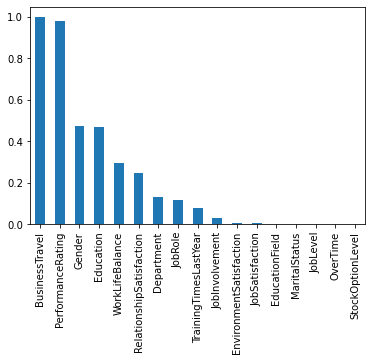

In [22]:
X = df_category.drop('Attrition',axis=1)
y = df_category['Attrition']
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending=False , inplace=True)
p_values.plot.bar()

Low Correlation: Education, Gender, PeformanceRating, WorkLifeBalance, NumCompaniesWorked, YearsSinceLastPromotion

 Age                         0.171214
Attrition                   1.000000
BusinessTravel             -0.029663
DailyRate                   0.056970
Department                  0.069104
DistanceFromHome           -0.079248
Education                   0.030346
EducationField             -0.070040
EnvironmentSatisfaction     0.096486
Gender                     -0.029453
HourlyRate                  0.006692
JobInvolvement              0.119496
JobLevel                    0.190370
JobRole                     0.036249
JobSatisfaction             0.102948
MaritalStatus               0.165126
MonthlyIncome               0.198305
MonthlyRate                -0.015258
NumCompaniesWorked         -0.030505
OverTime                    0.246118
PercentSalaryHike           0.023612
PerformanceRating          -0.002889
RelationshipSatisfaction    0.042664
StockOptionLevel            0.17

<AxesSubplot:>

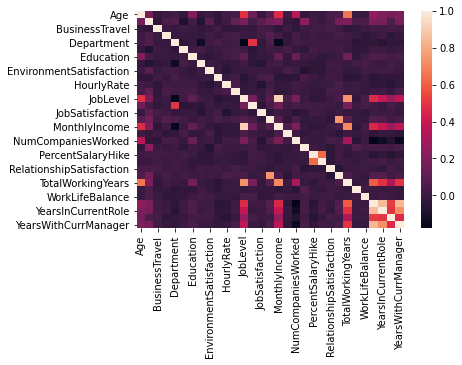

In [23]:
print('Age, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, OverTime, StockOptionLevel, Years')
corr = df.corr(method="spearman")
print('\n', corr['Attrition'])
sns.heatmap(corr)

# Performance Rating

Numerical variables VS PerformanceRating


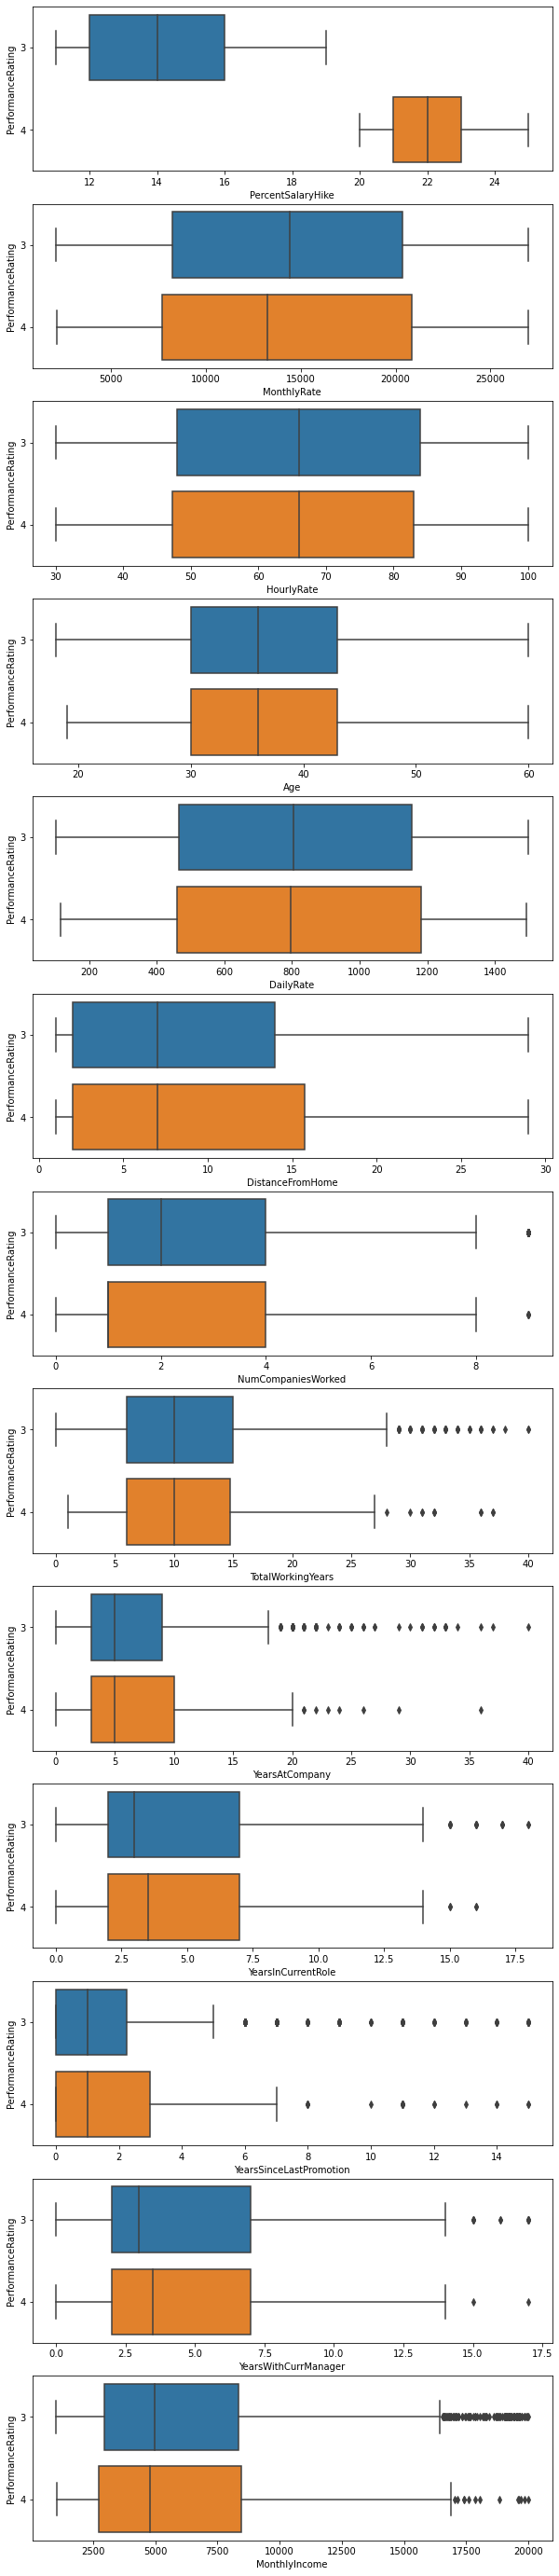

In [24]:
print('Numerical variables VS PerformanceRating')
f, ax = plt.subplots(13, 1, figsize=(10, 50))
for i, name in enumerate(df_numeric):
    sns.boxplot(x=name, y='PerformanceRating', data=df, orient='h', ax=ax[i])

Category Variable VS PerformanceRating


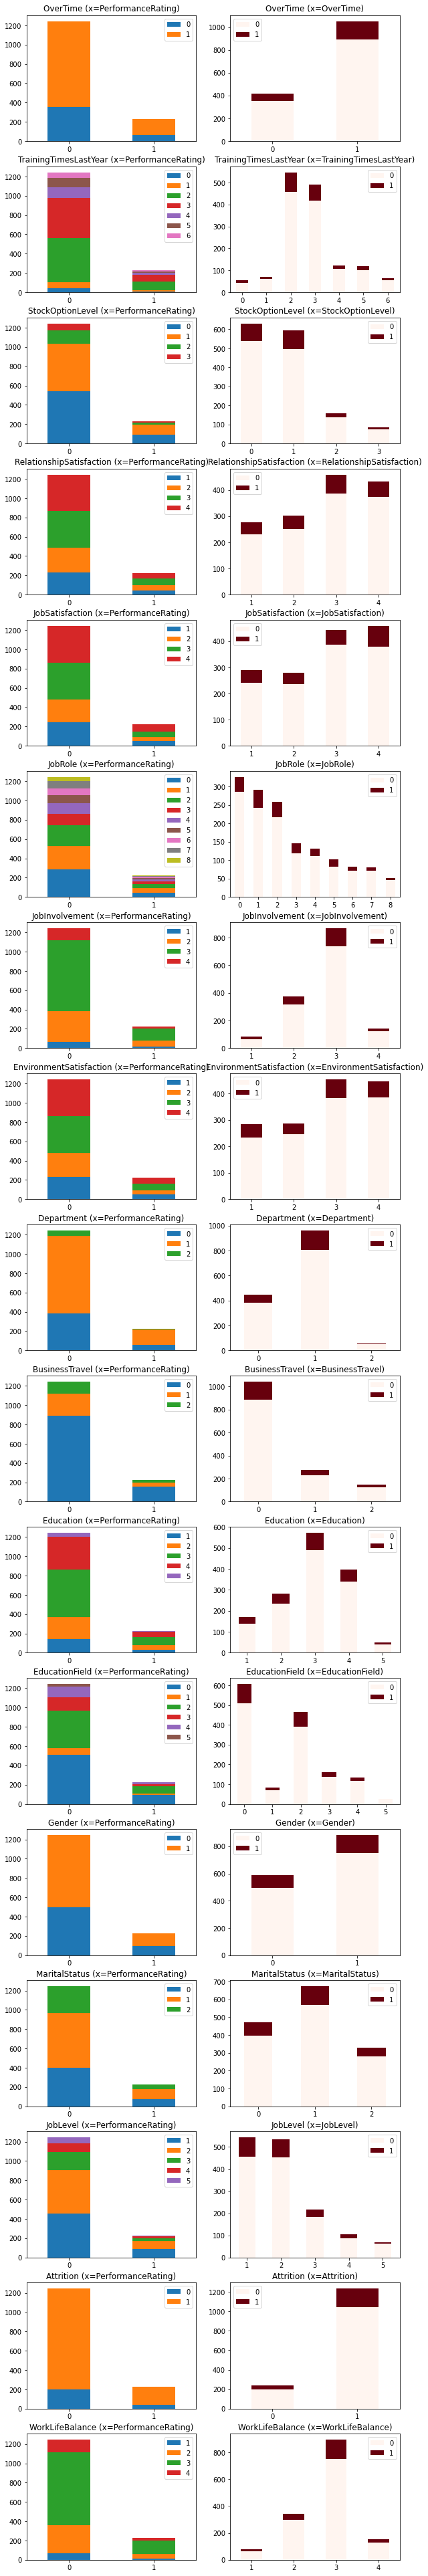

In [25]:
print('Category Variable VS PerformanceRating')
fig, ax = plt.subplots(17, 2, figsize=(10, 70))
for i, name in enumerate(df_category.drop(['PerformanceRating'], axis=1)):
    df_test = df[[name, 'PerformanceRating', 'Age']].groupby([name, 'PerformanceRating']).count()
    name_id = df_test.index.get_level_values(name).unique()
    dic = {j:list((df_test.loc[j])['Age']) for j in name_id}
    df_plot = pd.DataFrame(dic)
    df_plotT = df_plot.T
    pt0 = df_plot.reset_index().plot(
        x = 'index',
        rot = 0,
        kind = 'bar',
        stacked = True,
        title = name+' (x=PerformanceRating)',
        ax=ax[i, 0],
        legend = True,
    )
    pt1 = df_plotT.reset_index().plot(
        x = 'index',
        rot = 0,
        kind = 'bar',
        stacked = True,
        title = name+' (x='+name+')',
        ax=ax[i, 1],
        legend = True,
        colormap = 'Reds'
    )
    ax[i, 0].set(xlabel=None)
    ax[i, 1].set(xlabel=None)

<AxesSubplot:>

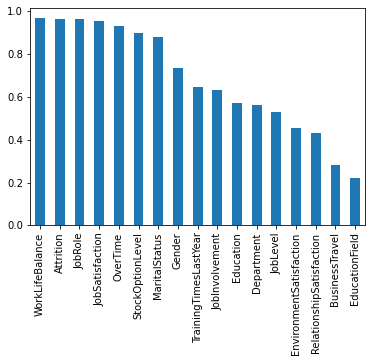

In [26]:
X = df_category.drop('PerformanceRating',axis=1)
y = df_category['PerformanceRating']
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending=False , inplace=True)
p_values.plot.bar()

Low Correlation: All

 Age                         0.000093
Attrition                  -0.002889
BusinessTravel              0.026881
DailyRate                   0.000624
Department                  0.026560
DistanceFromHome            0.011320
Education                  -0.025081
EducationField             -0.024993
EnvironmentSatisfaction    -0.029160
Gender                     -0.013859
HourlyRate                 -0.002185
JobInvolvement             -0.024733
JobLevel                   -0.018608
JobRole                     0.014651
JobSatisfaction             0.006979
MaritalStatus              -0.004739
MonthlyIncome              -0.026999
MonthlyRate                -0.009698
NumCompaniesWorked         -0.008298
OverTime                   -0.004369
PercentSalaryHike           0.628519
PerformanceRating           1.000000
RelationshipSatisfaction   -0.032989
StockOptionLevel            0.011028
TotalWorkingYears           0.011678
TrainingTimesLastYear      -0.016676
WorkLifeBalance

<AxesSubplot:>

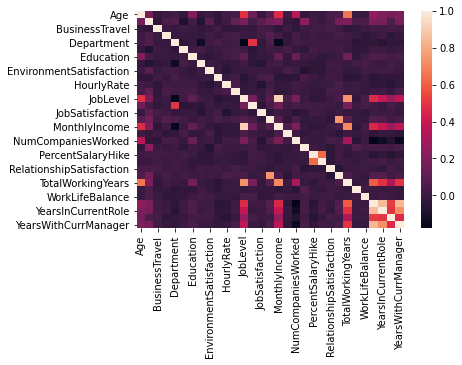

In [27]:
print('PercentSalaryHike')
corr = df.corr(method="spearman")
print('\n', corr['PerformanceRating'])
sns.heatmap(corr)

# WorkLifeBalance

Numerical variables VS WorkLifeBalance


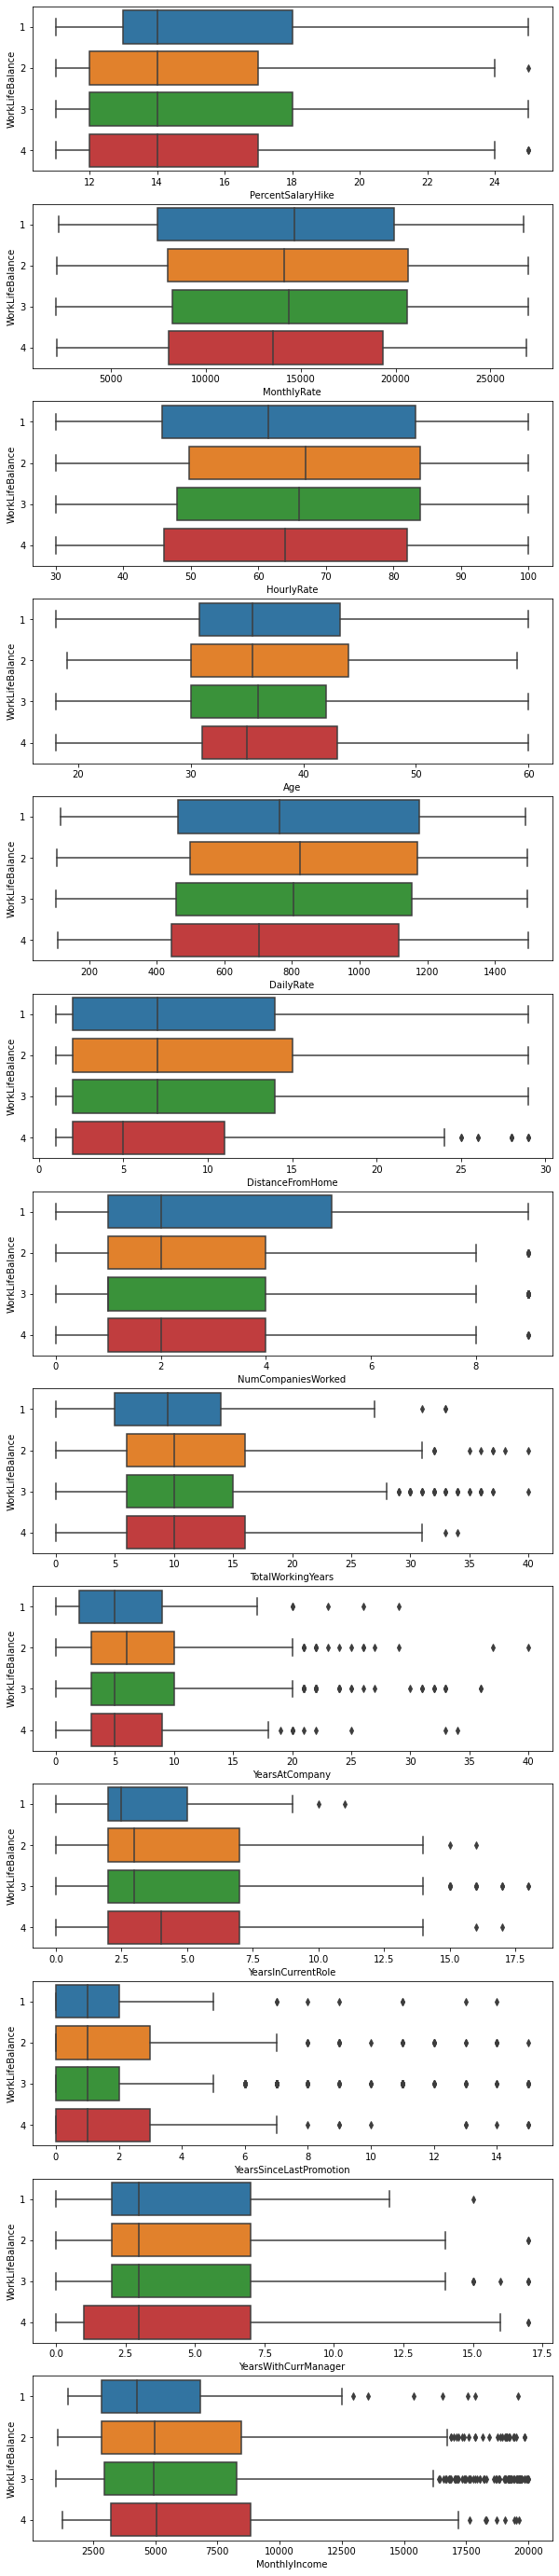

In [28]:
print('Numerical variables VS WorkLifeBalance')
f, ax = plt.subplots(13, 1, figsize=(10, 50))
for i, name in enumerate(df_numeric):
    sns.boxplot(x=name, y='WorkLifeBalance', data=df, orient='h', ax=ax[i])

Category Variable VS WorkLifeBalance


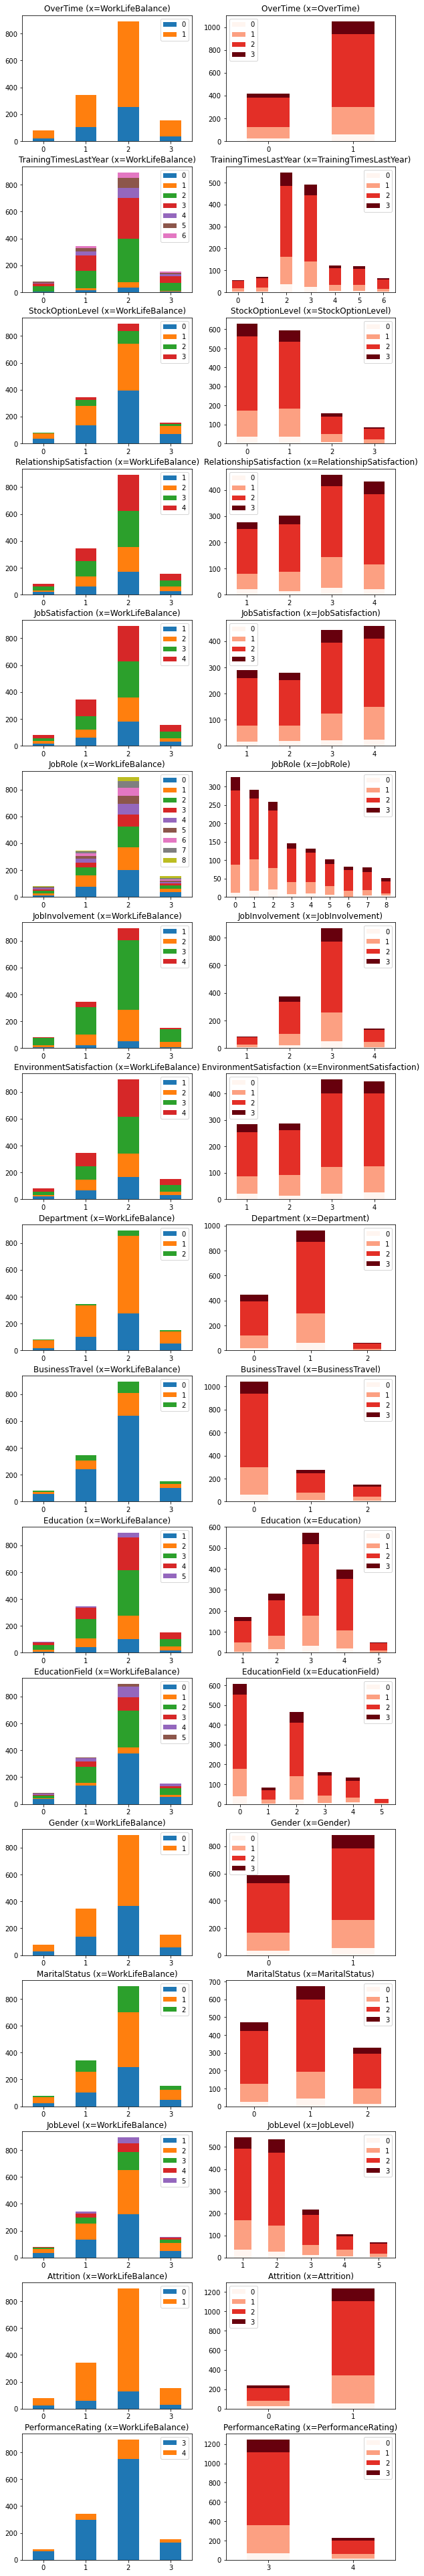

In [39]:
print('Category Variable VS WorkLifeBalance')
fig, ax = plt.subplots(17, 2, figsize=(10, 70))
for i, name in enumerate(df_category.drop(['WorkLifeBalance'], axis=1)):
    df_test = df[[name, 'WorkLifeBalance', 'Age']].groupby([name, 'WorkLifeBalance']).count()
    name_id = df_test.index.get_level_values(name).unique()
    dic = {j:list((df_test.loc[j])['Age']) for j in name_id}
    if name == 'StockOptionLevel':
        dic[3] = [0]+dic[3]
    df_plot = pd.DataFrame(dic)
    df_plotT = df_plot.T
    pt0 = df_plot.reset_index().plot(
        x = 'index',
        rot = 0,
        kind = 'bar',
        stacked = True,
        title = name+' (x=WorkLifeBalance)',
        ax=ax[i, 0],
        legend = True,
    )
    pt1 = df_plotT.reset_index().plot(
        x = 'index',
        rot = 0,
        kind = 'bar',
        stacked = True,
        title = name+' (x='+name+')',
        ax=ax[i, 1],
        legend = True,
        colormap = 'Reds'
    )
    ax[i, 0].set(xlabel=None)
    ax[i, 1].set(xlabel=None)

<AxesSubplot:>

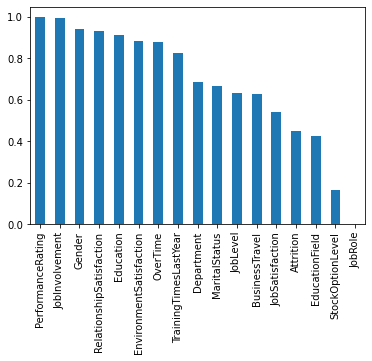

In [40]:
X = df_category.drop('WorkLifeBalance',axis=1)
y = df_category['WorkLifeBalance']
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending=False , inplace=True)
p_values.plot.bar()

Low Correlation: All

 Age                        -0.003707
Attrition                   0.051951
BusinessTravel              0.009237
DailyRate                  -0.040352
Department                 -0.024894
DistanceFromHome           -0.020402
Education                   0.017350
EducationField              0.033296
EnvironmentSatisfaction     0.027169
Gender                     -0.001702
HourlyRate                 -0.010003
JobInvolvement             -0.019889
JobLevel                    0.040466
JobRole                     0.039887
JobSatisfaction            -0.029781
MaritalStatus              -0.021277
MonthlyIncome               0.030759
MonthlyRate                 0.006316
NumCompaniesWorked          0.009103
OverTime                    0.030171
PercentSalaryHike           0.000930
PerformanceRating           0.006808
RelationshipSatisfaction    0.017684
StockOptionLevel           -0.016568
TotalWorkingYears           0.003004
TrainingTimesLastYear       0.023690
WorkLifeBalance

<AxesSubplot:>

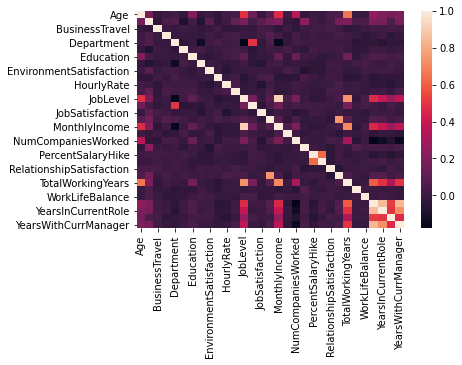

In [43]:
print('Low Correlation: All')
corr = df.corr(method="spearman")
print('\n', corr['WorkLifeBalance'])
sns.heatmap(corr)

# MonthlyIncome

Numerical variables VS MonthlyIncome


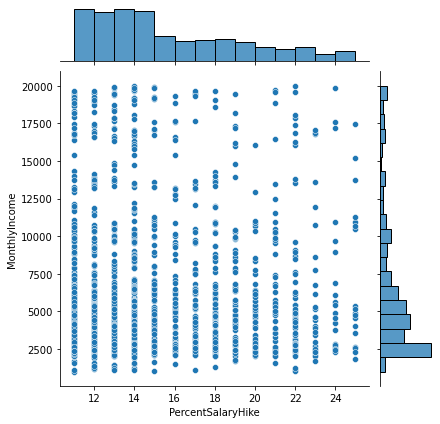

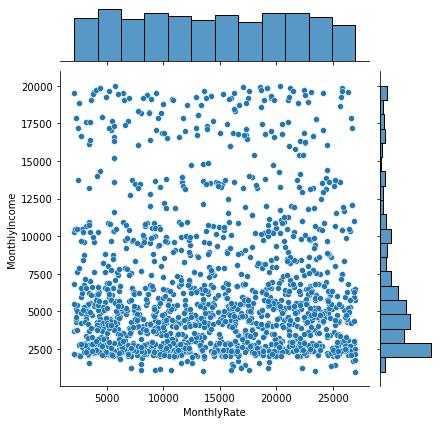

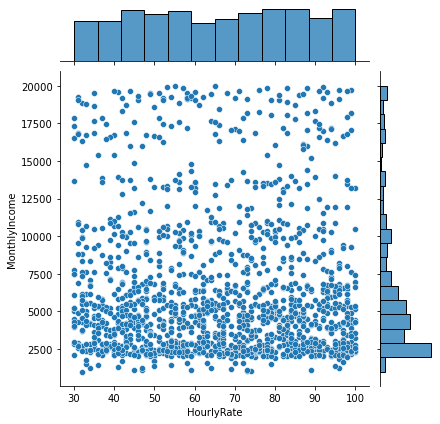

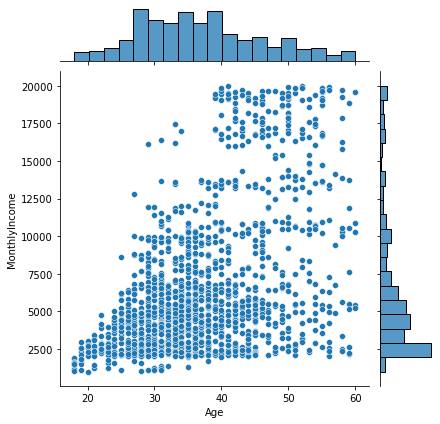

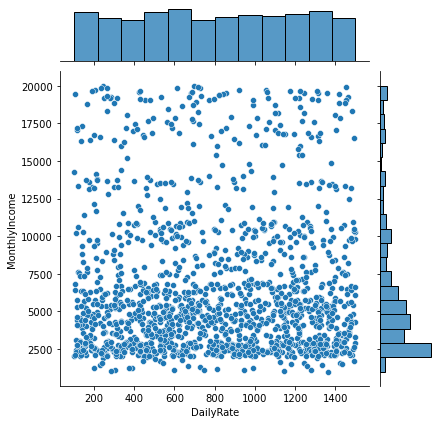

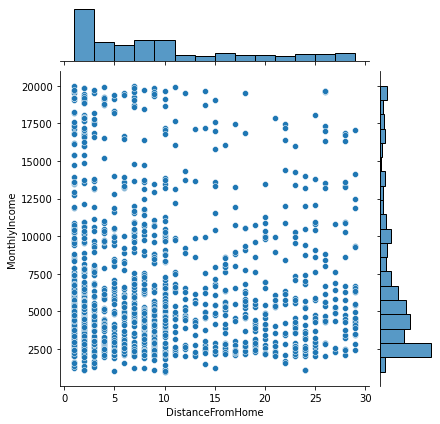

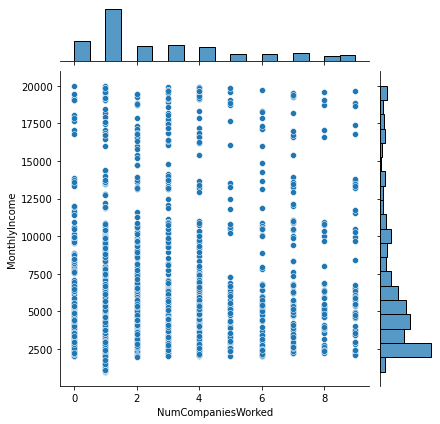

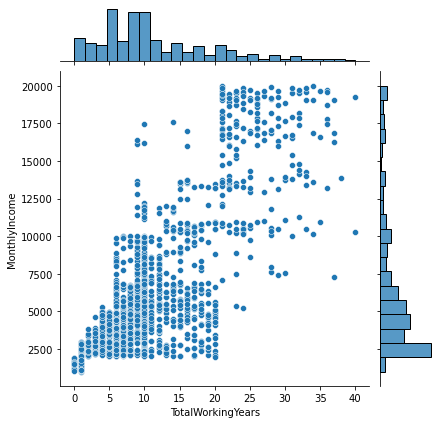

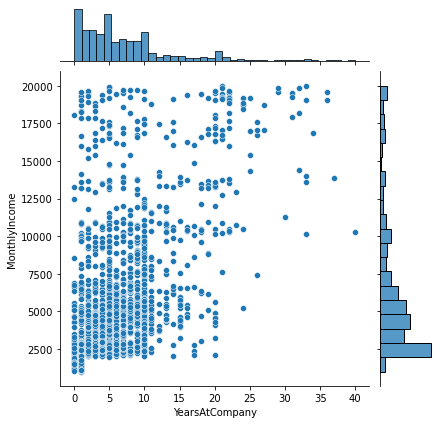

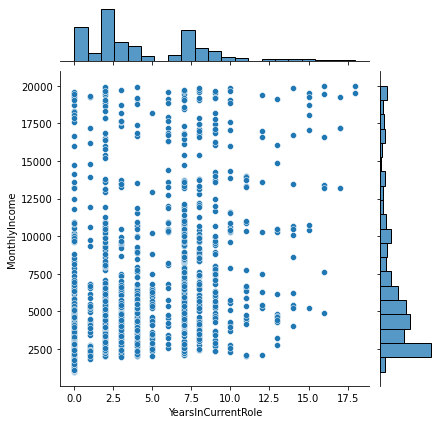

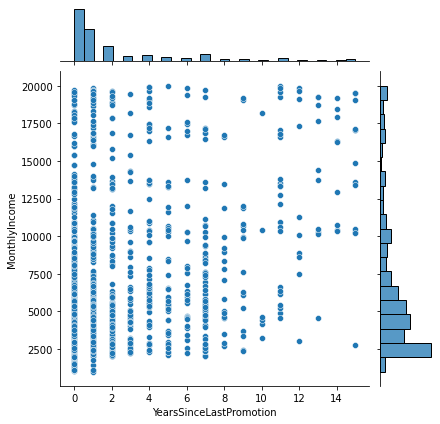

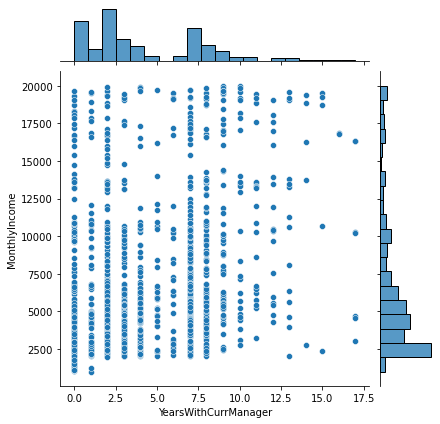

In [44]:
print('Numerical variables VS MonthlyIncome')
for i, name in enumerate(df_numeric.drop(['MonthlyIncome'], axis=1)):
    sns.jointplot(x=name, y='MonthlyIncome', data=df)
    plt.show()

Low Correlation: NumCompaniesWorked, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager
PercentSalaryHike         -0.027269
MonthlyRate                0.034814
HourlyRate                -0.015794
Age                        0.497855
DailyRate                  0.007707
DistanceFromHome          -0.017014
NumCompaniesWorked         0.149515
TotalWorkingYears          0.772893
YearsAtCompany             0.514285
YearsInCurrentRole         0.363818
YearsSinceLastPromotion    0.344978
YearsWithCurrManager       0.344079
MonthlyIncome              1.000000
Name: MonthlyIncome, dtype: float64


<AxesSubplot:>

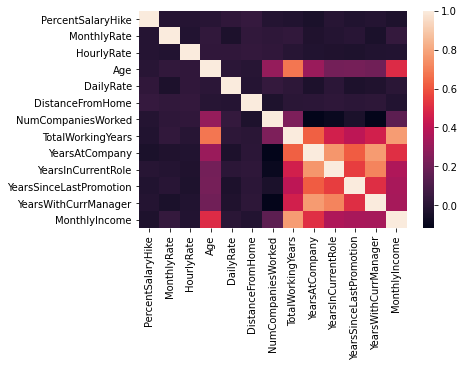

In [45]:
print('Low Correlation: NumCompaniesWorked, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager')
corr = df_numeric.corr()
print(corr['MonthlyIncome'])
sns.heatmap(corr)

MonthlyIncome VS Category


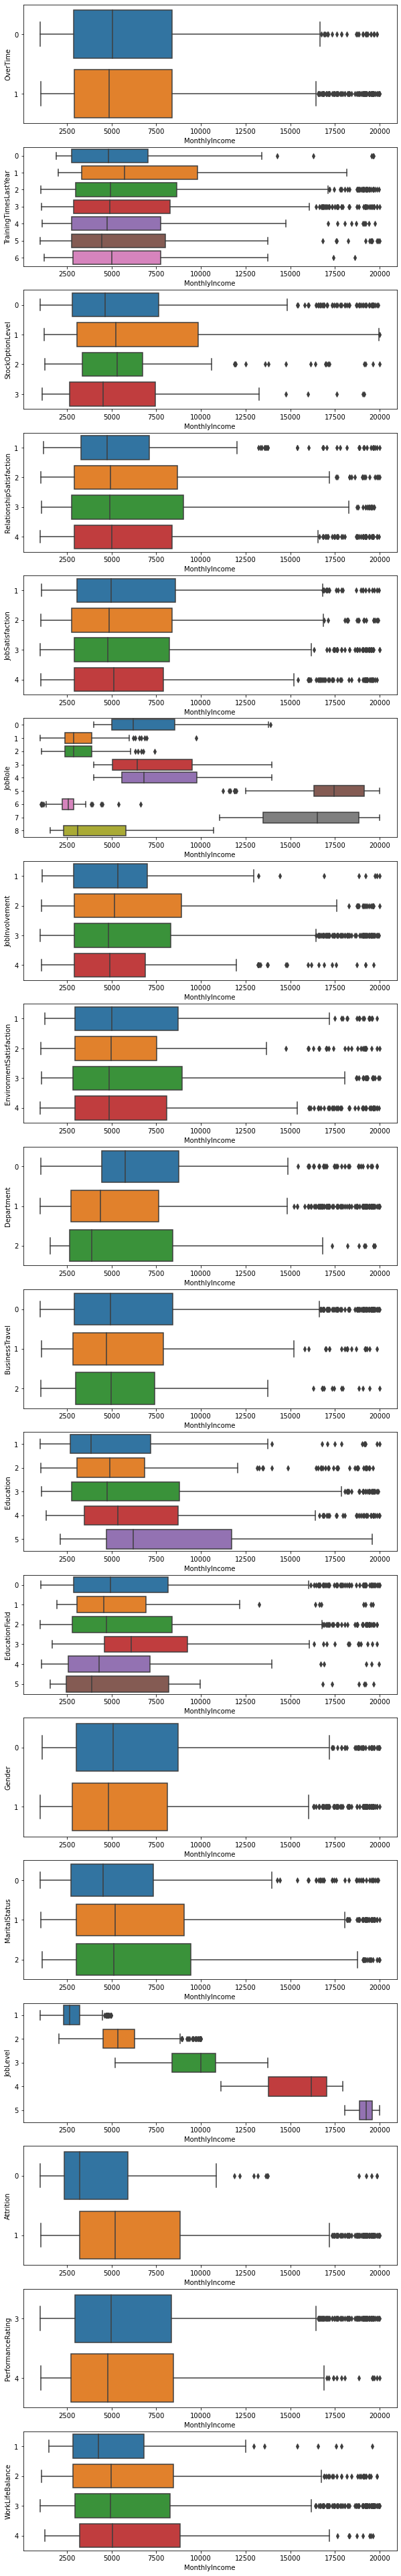

In [46]:
print('MonthlyIncome VS Category')
f, ax = plt.subplots(18, 1, figsize=(10, 70))
for i, name in enumerate(df_category):
    sns.boxplot(x='MonthlyIncome', y=name, data=df, orient='h', ax=ax[i])

High Correlation: Age,JobLevel, TotalWorkingYears, YearsAtCompany

 Age                         0.471902
Attrition                   0.198305
BusinessTravel             -0.027934
DailyRate                   0.016260
Department                 -0.165222
DistanceFromHome            0.002512
Education                   0.120028
EducationField              0.019467
EnvironmentSatisfaction    -0.015163
Gender                     -0.044456
HourlyRate                 -0.019762
JobInvolvement             -0.024552
JobLevel                    0.920429
JobRole                     0.154812
JobSatisfaction             0.004881
MaritalStatus               0.078601
MonthlyIncome               1.000000
MonthlyRate                 0.054277
NumCompaniesWorked          0.190307
OverTime                   -0.008910
PercentSalaryHike          -0.033767
PerformanceRating          -0.026999
RelationshipSatisfaction    0.003885
StockOptionLevel            0.045852
TotalWorkingYears           0.710024
Trainin

<AxesSubplot:>

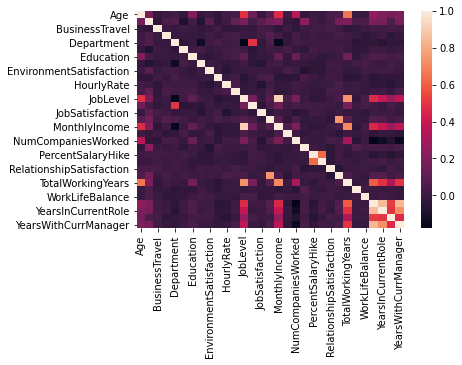

In [47]:
print('Age, Attrition, Department, Education, JobLevel, NumCompaniesWorked, Years')
corr = df.corr(method="spearman")
print('\n', corr['MonthlyIncome'])
sns.heatmap(corr)

In [ ]:
print('去掉比较相关的variables')
print('Oversample')